# Reviews Solicitation
---

## Bayesian Inference
- Bayesians go from prior to posterior is to use the laws of conditional probability,
sometimes called in this context Bayes rule or Bayes theorem
- Suppose we have a PDF $g$ for the prior distribution of the parameter $\theta$,
and suppose we obtain data $x$ whose conditional PDF given $\theta$ is $f$
- Then the joint distribution of data and parameters is conditional times marginal
$$f( x | \theta) g(\theta)$$
- May look strange because most of your training on considers the frequentist paradigm
- Here both $x$ and $\theta$ are random variables

- The correct posterior distribution, according to the Bayesian paradigm, is the conditional distribution of $\theta$ given $x$, which is joint divided by marginal
$$h (\theta | x) = \frac{f( x | \theta) g(\theta)}{\int f( x | \theta) g(\theta) d \theta}$$
- Often we do not need to do the integral if we recognize that
$$\theta \mapsto f( x | \theta) g(\theta)$$
is, except for constants, the PDF of a brand name distribution, then that distribution must be the posterior

---
## Binomial Data, Beta Prior

Suppose the prior distribution for $p$ is Beta($\alpha_1, \alpha_2$) and the conditional distribution of $x$ given $p$ is Bin($n$, $p$). Then
$$f(x|p) = {n \choose p} p^x (1-p)^{n-x}$$
and 
$$g(p) = \frac{\Gamma(\alpha_1 + \alpha_2)}{\Gamma(\alpha_1)\Gamma(\alpha_2)} p^{\alpha_1 -1} (1-p)^{\alpha_2 - 1}.$$
Then
$$f(x|p) g(p) = {n \choose p} \frac{\Gamma(\alpha_1 + \alpha_2)}{\Gamma(\alpha_1)\Gamma(\alpha_2)} p^{x + \alpha_1 -1} (1-p)^{n - x + \alpha_2 - 1}$$
and this, considered as a function of $p$ for fixed $x$ is, except for constants, the PDF of a Beta($x + \alpha_1, n - x + \alpha_2$) distribution. So that is the posterior.

Since we know the mean of a beta distribution, we can see the posterior mean is
$$E(p|x) = \frac{x + \alpha_1}{x + \alpha_1 + \alpha_2}$$

## Toy Example

Suppose we're interested in two cell phone traits, e.g. **cost** and **screen**.  For now, we consider only two possible ratings, e.g. **like** or **dislike**.  Suppose $p_c$ is the probability of liking the cost and $p_s$ is the probability of liking the screen.  Then we can Bayesian inference for $p_c$ and $p_s$.

Such inference requires choosing a prior (whose impact will decrease as we observe more data).  It's common to choose a Uniform prior.

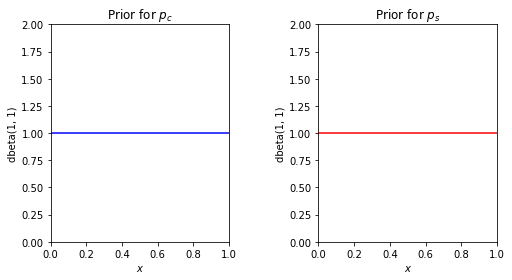

In [47]:
#%matplotlib inline
import numpy as np
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
from scipy.stats import beta

fig = plt.figure(figsize=(8, 4))
fig.subplots_adjust(wspace=0.5)

x = np.linspace(0, 1, 1002)[1:-1]
beta_prior = beta(1, 1)

ax = fig.add_subplot(1, 2, 1, xlabel=r'$x$', ylabel='dbeta(1, 1)',
                     xlim=(0, 1), ylim=(0, 2), title=r'Prior for $p_c$')
ax.plot(x, beta_prior.pdf(x), c='blue', label=r'$\alpha=1,\ \beta=1$')

ax = fig.add_subplot(1, 2, 2, xlabel=r'$x$', ylabel='dbeta(1, 1)',
                     xlim=(0, 1), ylim=(0, 2), title=r'Prior for $p_s$')
ax.plot(x, beta_prior.pdf(x), c='red', label=r'$\alpha=1,\ \beta=1$')

plt.show()

Now suppose we have 7 likes and 8 dislikes for cost and 3 likes and 1 dislike for screen and 7 likes.  Then, the posterior
of $p_c | x$ is a Beta($8, 9$) distribution and $p_s | x$ is a Beta($4, 2$) distribution.  Graphically, we have the following.

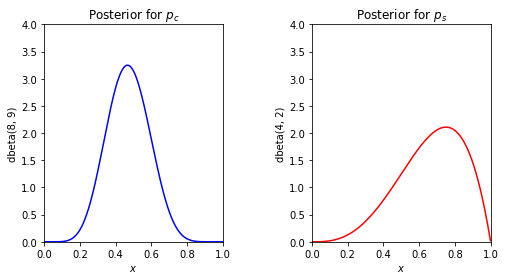

In [48]:
fig = plt.figure(figsize=(8, 4))
fig.subplots_adjust(wspace=0.5)

# Cost - Beta(8, 9)
ax = fig.add_subplot(1, 2, 1, xlabel=r'$x$', ylabel='dbeta(8, 9)',
                     xlim=(0, 1), ylim=(0, 4), title=r'Posterior for $p_c$')
ax.plot(x, beta(8, 9).pdf(x), c='blue', label=r'$\alpha=1,\ \beta=1$')

# Cost - Beta(4, 2)
ax = fig.add_subplot(1, 2, 2, xlabel=r'$x$', ylabel='dbeta(4, 2)',
                     xlim=(0, 1), ylim=(0, 4), title=r'Posterior for $p_s$')
ax.plot(x, beta(4, 2).pdf(x), c='red', label=r'$\alpha=1,\ \beta=1$')

plt.show()

Since the variance (or spread) for screen is larger, we may want to obtain more observations related to screen.

---
## Multinomial Data - Multi-level Ratings

Suppose that users can rate $1, 2, \ldots,$ or $k$ stars for each product's attribute, i.e. $k$ categories. Notate $(x_1, x_2, \ldots, x_k)$ as above categories' counts, $n = \Sigma {x_i}$. Our main interest is vector $p = (p_1, p_2, \ldots, p_k)$ that represents the probability (degree of belief) that users rate $1, 2, \ldots, k$ stars respectively. 

Suppose the prior distribution for $p = (p_1, p_2, \ldots, p_k)$ is Dirichlet of order $k \geq 2$ with parameters $\alpha_1, \alpha_2, \ldots, \alpha_k > 0$:
$$g(p) = \frac{1}{B(\alpha)} \prod_{i=1}^{k} p_i^{\alpha_i - 1}$$
and the likelihood $f(x | p)$ is multinomial distribution:
$$f(x|p) = \frac{n!}{x_1! \ldots x_k!} \prod_{i=1}^{k} p_i^{x_i}$$

Therefore we have the posterior:
$$h(p|x) \varpropto f(x|p)g(p) = \frac{n!}{x_1! \ldots x_k!} \times \frac{1}{B(\alpha)} \times \prod_{x=1}^{k} p_i^{x_i + \alpha_i - 1}$$
This is also a Dirichlet distribution with parameter $(x_1 + \alpha_1, \ldots, x_k + \alpha_k)$ that have the mean:
$$E[p_i|x] = \frac{x_i + \alpha_i}{\Sigma_{i=1}^{k} {(x_i + \alpha_i)} }$$
and variance:
$$Var[p_i|x] = \frac{\alpha_i(\alpha_0 - \alpha_i)}{\alpha_0^2(\alpha_0 + 1)}$$
where $\alpha_0 = \Sigma_{i=1}^{k} \alpha_i$, and co-variance:
$$Cov[p_i, p_j|x] = \frac{-\alpha_i \alpha_j}{\alpha_0^2(\alpha_0 + 1)}$$
__Note:__ covariance matrix is not invertible, thus have determinant $0$

For our purpose, we can consider the attribute that have small $\Sigma_i Var[p^i|x]$ to be stable. In another word, asking incoming users about an attribute that maximize $\Sigma_i Var[p^i|x]$.

### Toy example
Consider 2 cell phone traits again: **cost** and **screen**. This time, users can rate with $1, 2$ or $3$ stars. Suppose $p_c^1, p_c^2$ and $p_c^3$ are the probabilities of rating the cost with $1, 2$ and $3$ stars, $p_c^1 + p_c^2 + p_c^3 = 1$. Similarly, we have $p_s^1, p_s^2$ and $p_s^3$ for screen. Again, we do Bayesian inference for $p_c^i$ and $p_s^i$ with uniform prior, or Dirichlet distribution with all $\alpha_i$ to be the same $\alpha_i = \alpha = 1$.

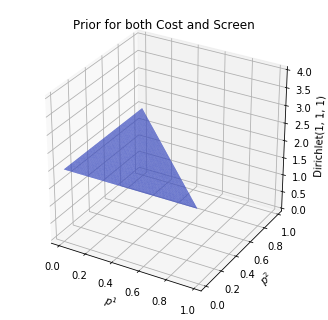

In [49]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import scipy.stats as stats


def dirichlet_coord(a1, a2, a3):
    x, y = np.mgrid[0.01:1:0.01, 0.01:1:0.01]
    x = x.flatten()
    y = y.flatten()
    xy = x + y
    x = x[xy < 1]
    y = y[xy < 1]
    xy_remain = 1 - (x + y)
    z = [stats.dirichlet.pdf([x[i], y[i], xy_remain[i]], [a1, a2, a3])
         for i in range(len(x))]
    z = np.array(z)
    return (x, y, z)

fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.gca(projection='3d', xlabel=r'$p^1$', ylabel=r'$p^2$',
             zlabel='Dirichlet(1, 1, 1)', zlim=(0, 4),
             title='Prior for both Cost and Screen', zmargin=1)
x, y, z = dirichlet_coord(1, 1, 1)
ax.plot_trisurf(x, y, z, cmap=cm.coolwarm, linewidth=0.0, antialiased=True)
plt.show()

We suppose that we have 4, 9, 20 ratings of 1, 2, 3 stars respectively for cost and 2, 4, 8 ratings of 1, 2, 3 stars respectively for screen. Then the posterior of the cost $h(p_c|x)$ and screen $h(p_s|x)$ are respectively Dirichlet(5, 10, 21) and Dirichlet(3, 5, 9). Consider variance for the cost:
$$\alpha_0 = \Sigma \alpha_i = 5 + 10 + 21 = 36$$
$$Var[p_c^1|x] = \frac{\alpha_1(\alpha_0 - \alpha_1)}{\alpha_0^2(\alpha_0 + 1)}=\frac{5\times 31}{36^2 \times 37} = 0.003,\qquad
Var[p_c^2|x] = \frac{10\times 26}{36^2 \times 37} = 0.005, \qquad
Var[p_c^3|x] = \frac{21\times 15}{36^2 \times 37} = 0.007$$
$$\Sigma_{i} Var[p_c^i|x] = 0.015$$

Similarly for the screen:
$$\alpha_0 = \Sigma \alpha_i = 3 + 5 + 9 = 17$$
$$Var[p_s^1|x] =\frac{3\times 14}{17^2 \times 18} = 0.008,\qquad
Var[p_s^2|x] =\frac{12\times 5}{17^2 \times 18} = 0.012,\qquad
Var[p_s^3|x] =\frac{9\times 8}{17^2 \times 18} = 0.014$$
$$\Sigma_{i} Var[p_s^i|x] = 0.034$$

In [50]:
from numpy import linalg as LA

def dirichlet_covars(alphas):
    alpha_0 = sum(alphas)
    denominator = alpha_0 ** 2 * (alpha_0 + 1)
    covars = [[(- alpha_i * alpha_j) / denominator for alpha_j in alphas]
              for alpha_i in alphas]
    return covars

def dirichlet_sum_square_covars(alphas):
    covars = dirichlet_covars(alphas)
    squared_covars = np.array(covars) ** 2
    return sum(squared_covars.flatten())

def weighted_sum_dirichlet_vars(alphas,
                                prior_count=None, prior_cost=None):
    sum_dirichlet_vars = sum(stats.dirichlet.var(alphas))
    if not prior_count or not prior_cost:
        prior_count = len(alphas)
        prior_cost = sum(stats.dirichlet.var([2] * prior_count))
    
    count = sum(alphas) - len(alphas)
    weighted_sum = (count * sum_dirichlet_vars + prior_count * prior_cost) / \
                    (count + prior_count)
    return weighted_sum

def first_eigen_values_of_covars_matrix(alphas):
    covars = dirichlet_covars(alphas)
    w, _ = LA.eig(covars)
    max_abs_index = np.argmax(np.absolute(w))
    return w[max_abs_index]

def criteria(attribute, alphas):
    print('Criteria of {}:'.format(attribute))
    print('    Variance: Sum = {:.3f}, Max = {:.3f}, Weighted_Sum_Uniform = {:.3f}, '
          'Weighted_Sum_Ave = {:.3f}'.format(
              sum(stats.dirichlet.var(alphas)),
              max(stats.dirichlet.var(alphas)),
              weighted_sum_dirichlet_vars(alphas),
              weighted_sum_dirichlet_vars(alphas, prior_count=70, prior_cost=sum(stats.dirichlet.var([21, 11, 41])))))
    print('    Covariance matrix: Sum of squared = {:.5f}, Most significant eigenvalue = {:.3f}'.format(
        dirichlet_sum_square_covars(alphas), first_eigen_values_of_covars_matrix(alphas)))
    print()

criteria('Cost', [5, 10, 21])
criteria('Screen', [3, 5, 9])

Criteria of Cost:
    Variance: Sum = 0.015, Max = 0.007, Weighted_Sum_Uniform = 0.022, Weighted_Sum_Ave = 0.010
    Covariance matrix: Sum of squared = 0.00014, Most significant eigenvalue = -0.012

Criteria of Screen:
    Variance: Sum = 0.033, Max = 0.014, Weighted_Sum_Uniform = 0.044, Weighted_Sum_Ave = 0.012
    Covariance matrix: Sum of squared = 0.00049, Most significant eigenvalue = -0.022



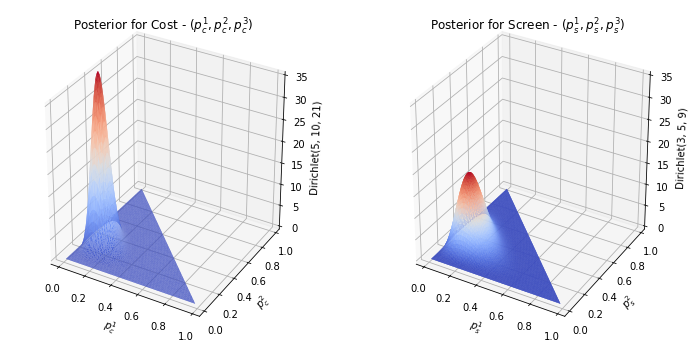

In [51]:
fig = plt.figure(figsize=(12, 6))

# Cost
ax = fig.add_subplot(1, 2, 1, projection='3d',
                     xlabel=r'$p_c^1$', ylabel=r'$p_c^2$',
                     zlabel='Dirichlet(5, 10, 21)', zlim=(0, 35),
                     title=r'Posterior for Cost - $(p_c^1, p_c^2, p_c^3)$')
x, y, z = dirichlet_coord(5, 10, 21)
ax.plot_trisurf(x, y, z, cmap=cm.coolwarm, linewidth=0.0, antialiased=True)

# Screen
ax = fig.add_subplot(1, 2, 2, projection='3d',
                     xlabel=r'$p_s^1$', ylabel=r'$p_s^2$',
                     zlabel='Dirichlet(3, 5, 9)', zlim=(0, 35),
                     title='Posterior for Screen - $(p_s^1, p_s^2, p_s^3)$')
x, y, z = dirichlet_coord(3, 5, 9)
ax.plot_trisurf(x, y, z, cmap=cm.coolwarm, linewidth=0.0, antialiased=True)

ax.plot_trisurf(x, y, z, cmap=cm.coolwarm, linewidth=0.0, antialiased=True)
plt.show()

Note that $p_c^3 = 1 - p_c^1 - p_c^2$ and $p_s^3 = 1 - p_s^1 - p_s^2$. Taking into account that the variance for screen is larger, we can ask users more questions about it.

To investigate the effect of different optimized criteria, consider 2 other attributes that have the same number of ratings as the Cost:
* **battery** got $11$ ratings for each level $1, 2, 3$ stars.
* **weight** got all $33$ ratings for $3$ stars and no ratings for $1, 2$ stars.

Similarly the posterior for battery $h(p_b|x)$ is Dirichlet(12, 12, 12), for weight $h(p_w|x)$ is Dirichlet(1, 1, 34).

Furthermore, consider another attribute, for instance **design**, with $0, 0, 11$ ratings for $1, 2, 3$ stars respectively. Then this attribute's posterior has the smaller sum of variance than cost and battery that have the number of ratings 3 times larger (33 ratings).

In [52]:
print('average_prior_count = 70, average_prior_cost (20, 10, 40) = {:.3f}'.format(
        sum(stats.dirichlet.var([21, 11, 41]))))
print('uniform_prior_count = 3, average_prior_cost (1, 1, 1) = {:.3f}'.format(
        sum(stats.dirichlet.var([2, 2, 2]))))

average_prior_count = 70, average_prior_cost (20, 10, 40) = 0.008
uniform_prior_count = 3, average_prior_cost (1, 1, 1) = 0.095


In [53]:
criteria('Cost', [5, 10, 21])
criteria('Screen', [3, 5, 9])
criteria('Battery', [12, 12, 12])
criteria('Weight', [1, 1, 34])
criteria('Design', [1, 1, 12])
criteria('Durability', [1, 1, 4])

Criteria of Cost:
    Variance: Sum = 0.015, Max = 0.007, Weighted_Sum_Uniform = 0.022, Weighted_Sum_Ave = 0.010
    Covariance matrix: Sum of squared = 0.00014, Most significant eigenvalue = -0.012

Criteria of Screen:
    Variance: Sum = 0.033, Max = 0.014, Weighted_Sum_Uniform = 0.044, Weighted_Sum_Ave = 0.012
    Covariance matrix: Sum of squared = 0.00049, Most significant eigenvalue = -0.022

Criteria of Battery:
    Variance: Sum = 0.018, Max = 0.006, Weighted_Sum_Uniform = 0.024, Weighted_Sum_Ave = 0.011
    Covariance matrix: Sum of squared = 0.00008, Most significant eigenvalue = -0.009

Criteria of Weight:
    Variance: Sum = 0.003, Max = 0.001, Weighted_Sum_Uniform = 0.011, Weighted_Sum_Ave = 0.006
    Covariance matrix: Sum of squared = 0.00058, Most significant eigenvalue = -0.024

Criteria of Design:
    Variance: Sum = 0.017, Max = 0.008, Weighted_Sum_Uniform = 0.034, Weighted_Sum_Ave = 0.009
    Covariance matrix: Sum of squared = 0.00247, Most significant eigenvalue =

[comment]: $$Var[p_b^i|x] = \frac{12\times 24}{36^2 \times 37} = 0.006, \Sigma_i Var[p_b^i|x] = 0.018$$
[comment]: $$Var[p_w^3|x] = \frac{34\times 2}{36^2 \times 37} = 0.0014, Var[p_w^1|x] = Var[p_w^2|x] = 0.0007, \Sigma_i Var[p_w^i|x] = 0.003$$
[comment]: $$\Sigma_i Var[p_w^i|x] < \Sigma_i Var[p_c^i|x] < \Sigma_i Var[p_b^i|x]$$

|Property | Weight | Cost | Battery | Design | Durability |
|:-------:|:------:|:----:|:-------:|:------:|:----------:|
|Ratings (1, 2 or 3 stars)  |0, 0, 33|4, 9, 20|11, 11, 11|0, 0, 11 (only 11 ratings)|0, 0, 3|
|Sum of Variance (SoV)|0.003 | 0.015 | **0.018**|0.017|0.071|
|Weighted SoV wt uniform: m=3, $V_0$=0.095|0.011 | 0.022 | 0.024 |0.034|0.083|
|Weighted SoV wt average: m=70, $V_0$=0.008|0.006 | 0.010 | 0.011 |0.009|0.010|
|Maxium of Variance|0.001 | **0.007** | 0.006|**0.008**|0.032|
|Sum of Squared Covariance|**0.00058**|0.00014|0.00008|**0.00247**|0.00510|
|Largest Eigenvalue of Covariance Matrix|-0.024|-0.012|-0.009|-0.050|-0.071|

**Interpretation**:
* Cost and Battery has way more ratings than Screen, thus more stable than Screen.
* Cost, Battery and Weight have the same number of ratings but Cost's variance is a little bit smaller (less spreading) than Battery's variance, while Weight's variance is way the smallest.
* Sum of variance seems to be a good criteria regarding to optimizing rating's polarization.
* Covariance doesn't make sense in this case since it captures the linear relationship between two probabilities (e.g., $p_c^2, p_c^3$)

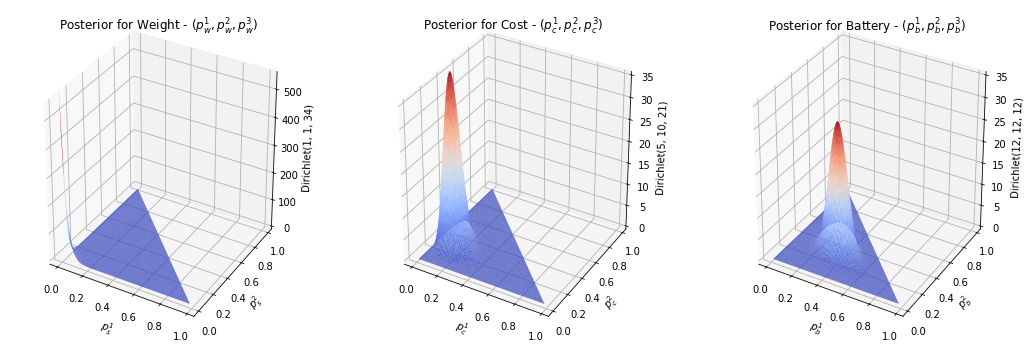

In [54]:
fig = plt.figure(figsize=(18, 6))

# Weight
ax = fig.add_subplot(1, 3, 1, projection='3d',
                     xlabel=r'$p_s^1$', ylabel=r'$p_s^2$',
                     zlabel='Dirichlet(1, 1, 34)', zlim=(0, 550),
                     title='Posterior for Weight - $(p_w^1, p_w^2, p_w^3)$')
x, y, z = dirichlet_coord(1, 1, 34)
ax.plot_trisurf(x, y, z, cmap=cm.coolwarm, linewidth=0.0, antialiased=True)

# Cost
ax = fig.add_subplot(1, 3, 2, projection='3d',
                     xlabel=r'$p_c^1$', ylabel=r'$p_c^2$',
                     zlabel='Dirichlet(5, 10, 21)', zlim=(0, 35),
                     title=r'Posterior for Cost - $(p_c^1, p_c^2, p_c^3)$')
x, y, z = dirichlet_coord(5, 10, 21)
ax.plot_trisurf(x, y, z, cmap=cm.coolwarm, linewidth=0.0, antialiased=True)

# Battery
ax = fig.add_subplot(1, 3, 3, projection='3d',
                     xlabel=r'$p_b^1$', ylabel=r'$p_b^2$',
                     zlabel='Dirichlet(12, 12, 12)', zlim=(0, 35),
                     title='Posterior for Battery - $(p_b^1, p_b^2, p_b^3)$')
x, y, z = dirichlet_coord(12, 12, 12)

ax.plot_trisurf(x, y, z, cmap=cm.coolwarm, linewidth=0.0, antialiased=True)
plt.show()

---
## Open for discussion
So far, we have a nice framework for estimating the certainty of $p_c^1, p_c^2, p_c^3$ of an attribute. The simplest criterion for choosing an attribute to ask users is the variance's sum: $\Sigma_i p_c^i$. That simple criterion surprisingly is the best at this moment. The criterion of covariance matrix's determinant is ruled out since it's $0$ for all cases (covariance matrix is not invertible). However, there are other aspects worth considering as below.

### Some attributes are more important and keep asking a rare feature is actually wasting
On the other side, the important attributes are normalled got many ratings already. In another word, importance and variance is somewhat inversally proportional. We need a way to balance the role of these two objectives. A good candidate is using [Baysian Average](https://en.wikipedia.org/wiki/Bayesian_average) that is also utilized in [IMDB rating](http://www.imdb.com/help/show_leaf?votestopfaq):

$$\text{weighted rating } (WR) = \frac{v \times R + m \times C}{v + m}$$

Where: 
* $R$ = average for the movie (mean) = (Rating)
* $v$ = number of votes for the movie = (votes)
* $m$ = minimum votes required to be listed in the Top 250
* $C$ = the mean vote across the whole report (global average)

[A nice explaination here - Of Bayesian average and star ratings](http://fulmicoton.com/posts/bayesian_rating/)

[How to Count Thumb-Ups and Thumb-Downs: User-Rating based Ranking of Items from an Axiomatic Perspective](http://www.dcs.bbk.ac.uk/~dell/publications/dellzhang_ictir2011.pdf)

[Hacker News](https://news.ycombinator.com/item?id=3792627)

The adapted formula for weighted sum of variance of a feature can be:
$$\text{weighted variance } (WV) = \frac{r \times V  + m \times V_0}{r + m}$$
Where:
* $r = $ number of ratings
* $V = $ sum of variance
* $m = $ prior number of ratings every feature get, e.g. in Edmund dataset, $m$ can be 5, i.e. each star get 1 vote.
* $V_0 = $ prior (global) sum of variance for every feature, e.g. in Edmund dataset, $V_0$ is computed in the case each star get 1 vote.

### Attributes are correlated.
Ratings of an attribute somewhat imply about its correlated attributes.
* How about [cross-covariance](https://en.wikipedia.org/wiki/Cross-covariance)? Considering that each feature has a random variable vector, e.g.: $p_s = (p_s^1, p_s^2, p_s^3)$ for screen. Then, we "can" evaluate cross-covariance between $p_s$ of cost and $p_b$ of brightness: $Cov(p_s, p_b)$. However I couldn't find any sources about computing  it for Dirichlet distribution.
* Another option is [Grouped Dirichlet Distribution (GDD)](https://en.wikipedia.org/wiki/Grouped_Dirichlet_distribution) that can be used to estimate the variance of probability (screen=3\*, brightness=3\*) - $p_{cost=3, design=2}$. A nice thing about GDD is that GDD is also a natural conjugate prior with appropriate likelihood [Grouped Dirichlet distribution: A new tool for incomplete categorical data analysis](http://www.sciencedirect.com/science/article/pii/S0047259X07000127). However, more thought is needed to make use of the variance of probability (Cost=3\*, Brightness=2\*).
* Estimate conditional probability of two features, e.g. $P(screen = 3 | brightness = 3)$. Need to check reviews that contains both these features. Then how does this conditional probability help us?

### Dynamic features set

In many domains, such as Amazon reviews, product's features set is dynamic. Features are extracted from free-text reviews, so the features set grows gradually. Hence, in our framework, beside asking features, the system still need to support free-text reviews section that help adding new features.

### Others

* Moreover, we also need to take into account the possibility that customers answer our question. Customers may not have the knowledge about that feature, or just don't want to talk about it. Let assume a possibility that customers answer as $p_a$.

* Another question is whether do we want to minimize cost $C$ as soon as possible or after a pre-defined $k$ reviews.

## Simulation

For picking questions/features, there are 3 ways:
1. **greedily_pick**: always pick the feature that has the highest cost (try to reduce).
2. **greedily_pick_prob**: pick features with probabilities proporitional to their costs.
3. **randomly_pick**: ask its name, disregard features' costs.

For each asked feature/question, there are 2 ways to answer using our real dataset:
1. **answer_in_time_order**: answer using reviews in chronological order. If the asked doesn't appear in answered review, consider as no answer.
2. **answer_by_gen**: generate answers using the product's rating distribution. Note: always get answer.
    * When we ask a customer for multiple features, there may be more sound to answer by updated distribution. That is after generated rating for a feature, update the distribution of ratings for the next feature using conditional probability. Assuming that we need to generate answer for $screen$ and $brightness$. After generating the rating for $screen = 3$, generating the answer for $brightness$ using $P(brightness | screen = 3)$.

---
## References

A couple of resources are as follows.
1. [Dirichlet Distribution](https://en.wikipedia.org/wiki/Dirichlet_distribution)
2. [Bayesian Inference for Categorical Data Analysis](http://www.stat.ufl.edu/~aa/cda2/bayes.pdf)